In [90]:
import re
import os
import Levenshtein
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
companies = ["ATIC", "DIVA", "EMTK", "KREN", "MCAS", "MLPT", "MTDL", "NFCX", "PTSN"]

years = ["2018", "2020", "2022"]

data = []

for i in companies:
    for j in years:
        path = f"./datasets/texts/{i}/{j}.md"
        with open(path, "rb") as t:
            data.append(t.readlines())

# display(data)
# print(len(data))

In [92]:
# Paragraph Level
paragraph = []
for t in range(len(data)):
    tmp = []
    one_paragraph = ""
    for u in range(2, len(data[t])):
        res = data[t][u].decode("utf-8").replace("\r\n", " ")
        if res == " ":
            tmp.append(one_paragraph.rstrip())
            one_paragraph = ""
            continue
        one_paragraph += res
    paragraph.append(tmp)

# display(paragraph)
# print(len(paragraph))

In [93]:
# Sentece Level
sentences = []
for p in range(len(paragraph)):
    temp = []
    for q in range(len(paragraph[p])):
        res = re.split(r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", paragraph[p][q])
        for s in res:
            temp.append(s)
    sentences.append(temp)

# display(sentences[0])
# print(len(sentences))

In [95]:
# Word Level
words = []
for w in range(len(sentences)):
    temp = []
    for x in range(len(sentences[w])):
        res = re.findall(r"([^\W]+)\s", sentences[w][x])
        for wr in res:
            temp.append(wr)
    words.append(temp)

# display(words[0])
# print(len(words))

In [96]:
# TF-IDF
def tfidf_vectorizer(args):
    vectorizer = TfidfVectorizer()
    vec = vectorizer.fit_transform(args)
    return vec.toarray()

In [97]:
def minisom_batch(x, y, inp_len, learn_rate, rand_seed, data, iteration):
    som = MiniSom(
        x,
        y,
        inp_len,
        sigma=1.5,
        learning_rate=learn_rate,
        activation_distance="euclidean",
        topology="hexagonal",
        neighborhood_function="gaussian",
        random_seed=rand_seed,
    )
    som.train_batch(data, iteration, verbose=True)
    return som

In [98]:
def get_winning_neuron(som, data):
    # Initialize a list to store the winning neuron indices
    winners = []

    # Iterate over your input data
    for i in range(len(data)):
        # Get the winner neuron index for the i-th input data point
        winner = som.winner(data[i])
        # Append the winner neuron index to the list
        winners.append(winner)

    return winners

In [99]:
def calc_similarity(hist1, hist2):
    # Convert histograms to strings
    histogram1_str = ','.join(map(str, hist1))
    histogram2_str = ','.join(map(str, hist2))

    # Calculate Levenshtein distance
    similarity = 1 - (Levenshtein.distance(histogram1_str, histogram2_str) / max(len(histogram1_str), len(histogram2_str)))

    return similarity


In [100]:
def save_list(lists, file):
    with open(file, "w") as f:
        for list in lists:
            f.write(f"{list}\n")


def read_list(file):
    res = []
    with open(file, "r") as f:
        content = f.readlines()
        for line in content:
            # Remove linebreak which is the last character of the string
            curr_place = line[:-1]
            # Add item to the list
            res.append(int(curr_place))
    return res

In [101]:
def show_hist(winners, bins, save_path):
    # Extract the x index from the winners list
    x_indices = [winner[0] for winner in winners]
    save_list(x_indices, f"{save_path}.md")

    # Plot the histogram
    plt.hist(x_indices, bins)
    plt.xlabel('X Index')
    plt.ylabel('Frequency')
    # plt.title('1D Histogram of Winning Neuron X Indices')
    plt.savefig(save_path)
    plt.show()


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4768470909295066


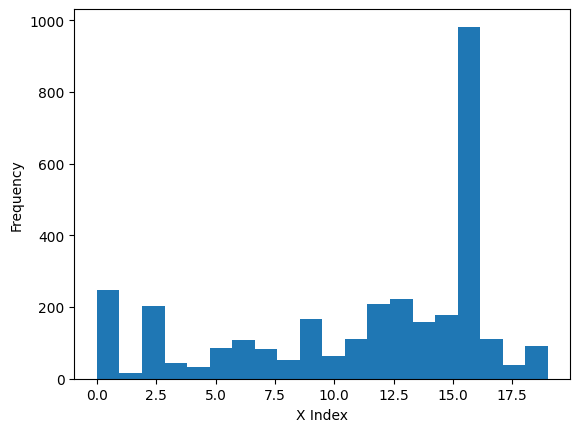

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5209386804935795


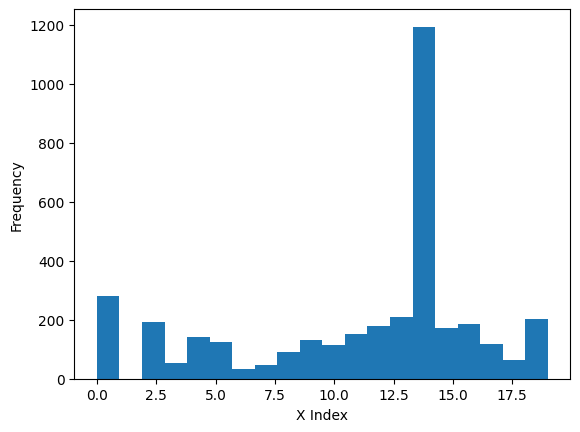

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.45424101521980653


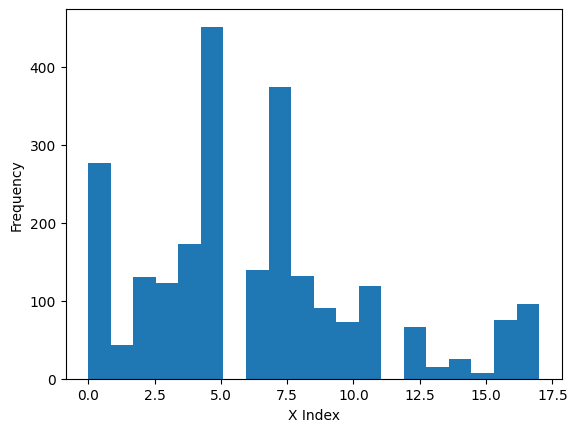

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5239911813402047


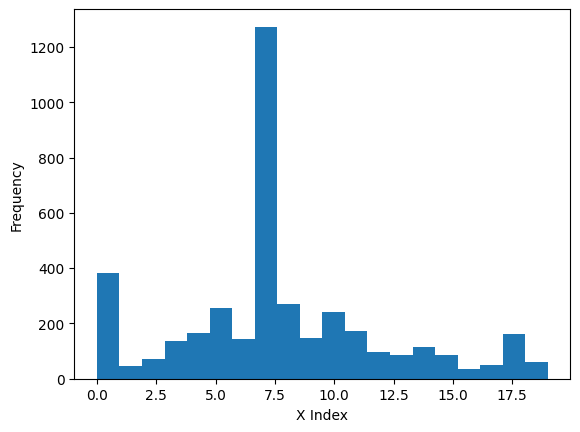

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4614414697518919


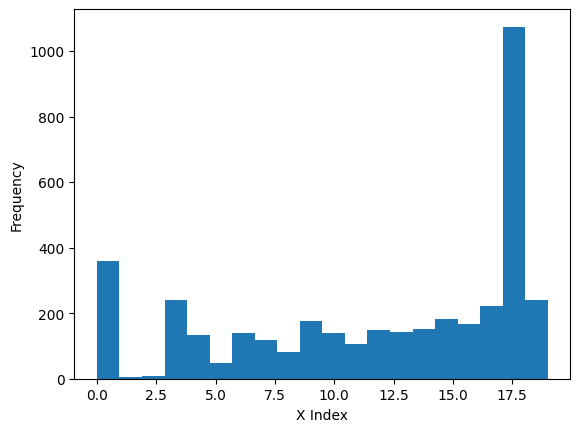

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5178093240240941


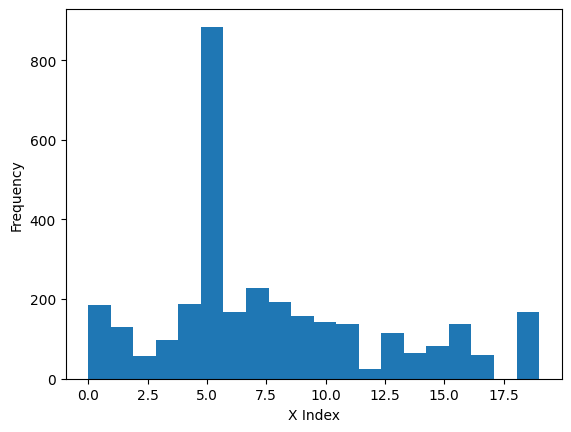

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3538635261672551


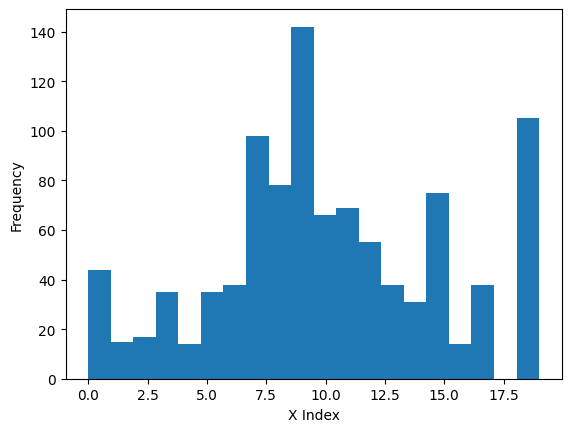

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3374234354334284


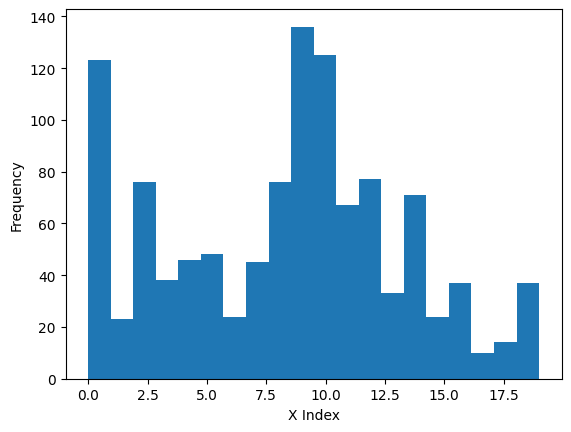

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5698157705235173


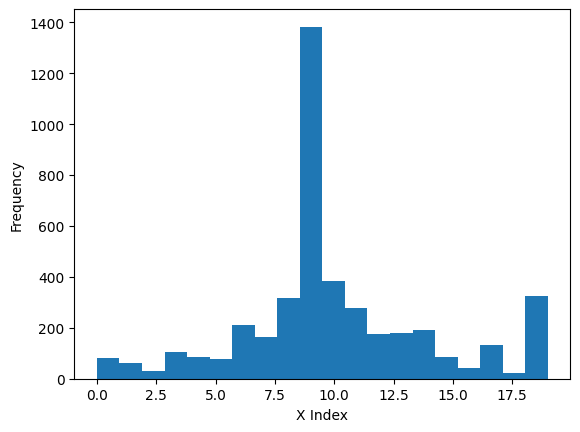

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5709928608455571


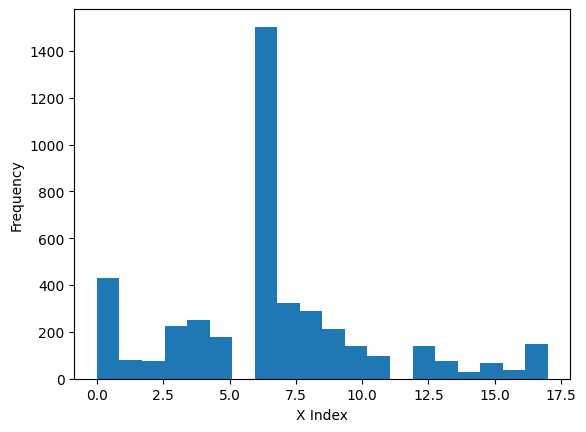

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4935947891526225


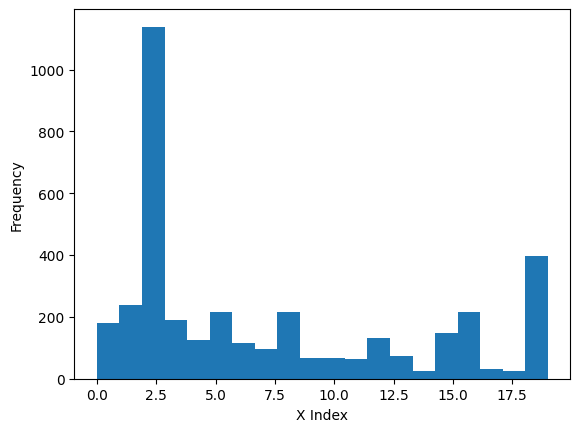

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4695079794788037


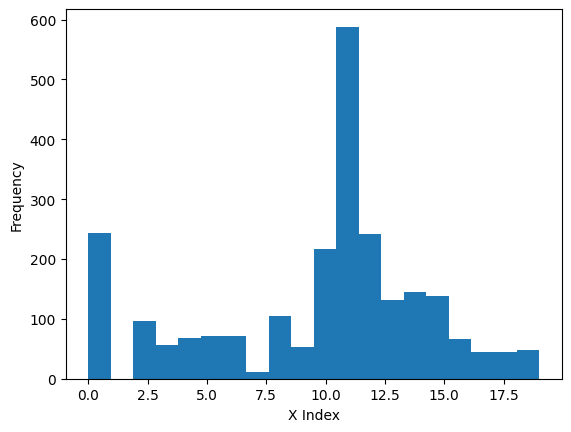

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5365630767236128


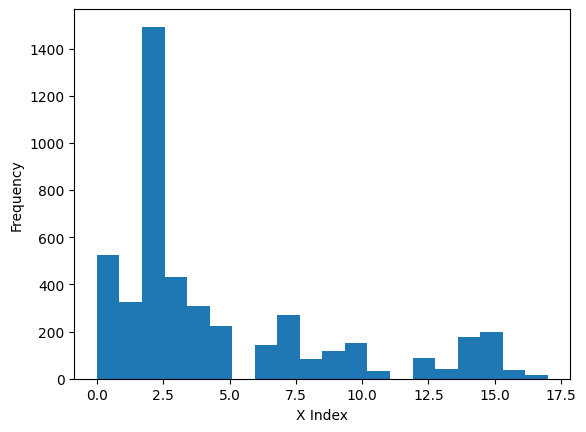

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5442061288686729


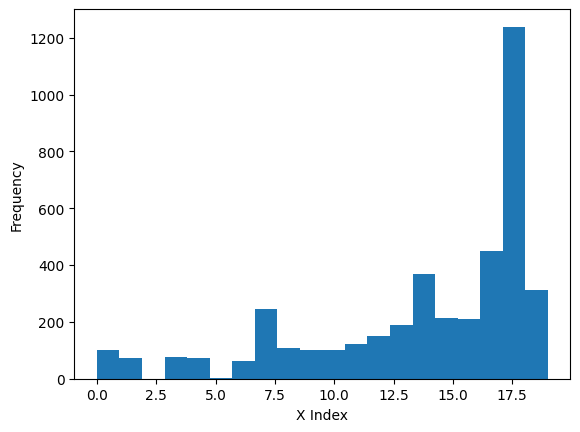

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5358386393525195


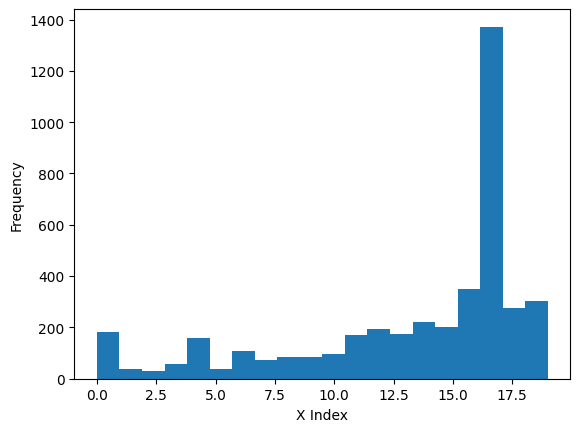

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.49389011462158644


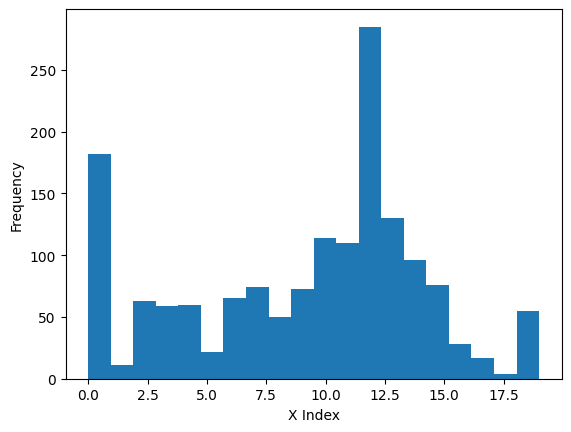

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.541657681309238


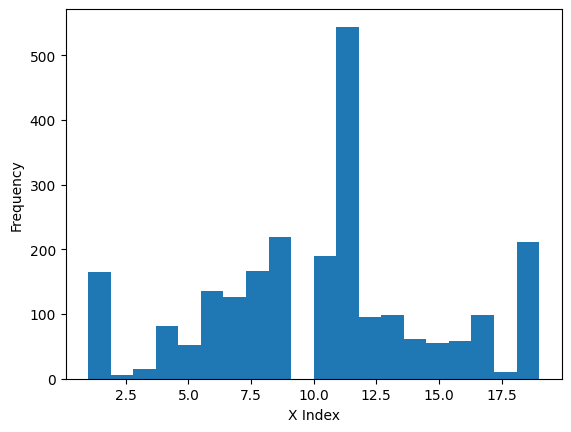

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5267755230118026


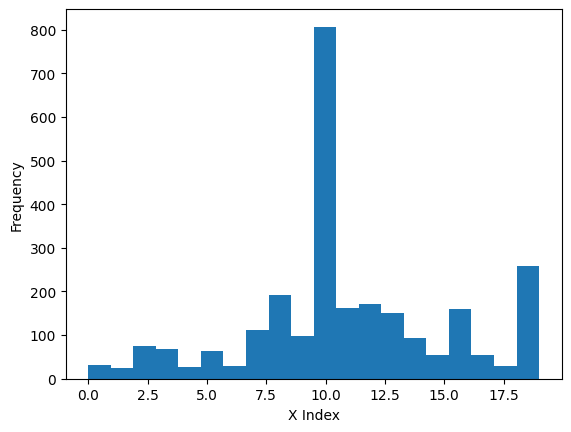

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5529387737929922


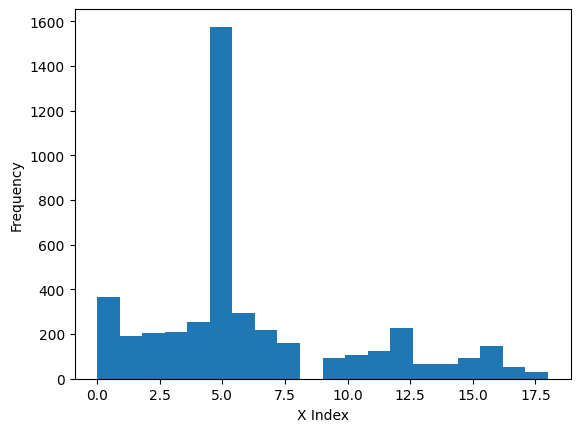

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5568547811798028


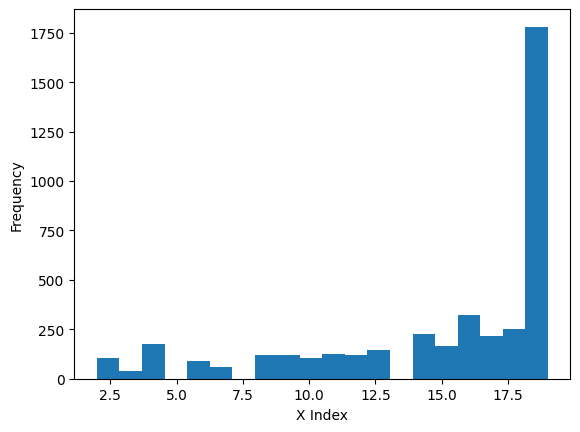

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5794791526149115


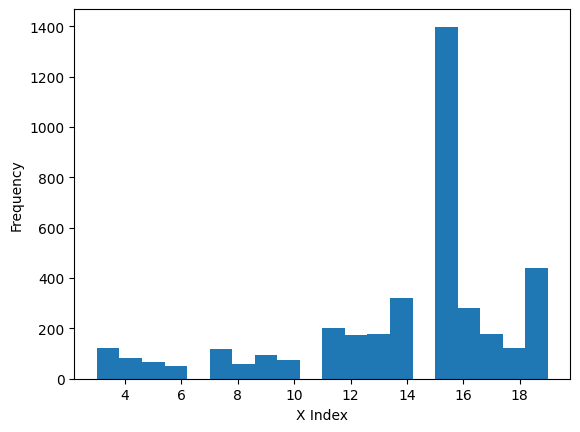

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.50721547402412


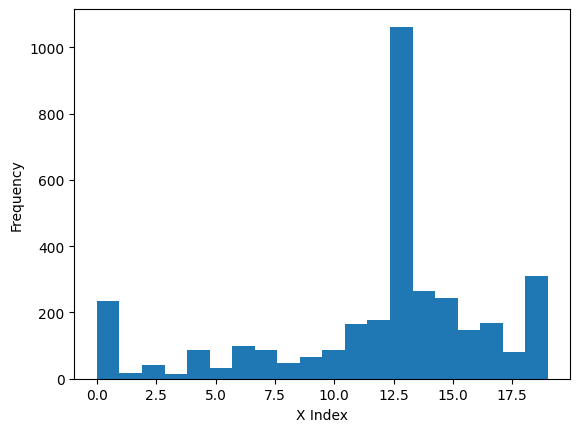

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4808440382133048


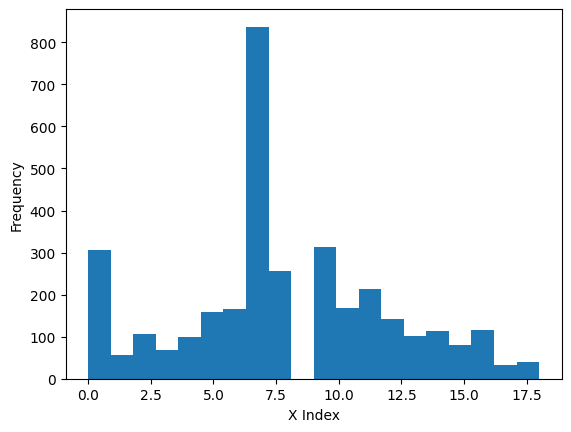

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5376618386614491


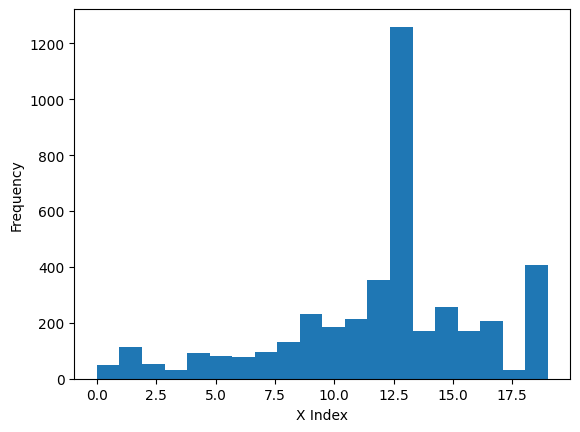

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.35075503050671186


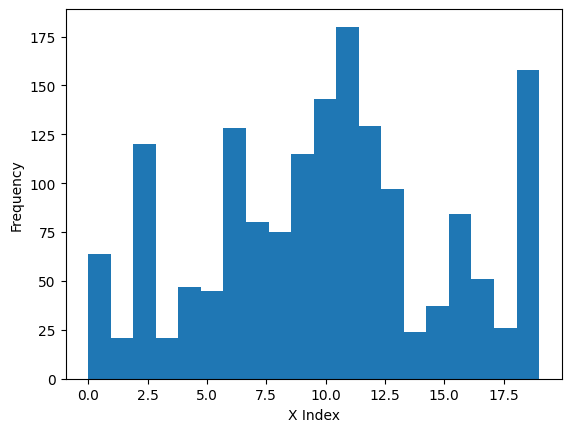

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3691568359953307


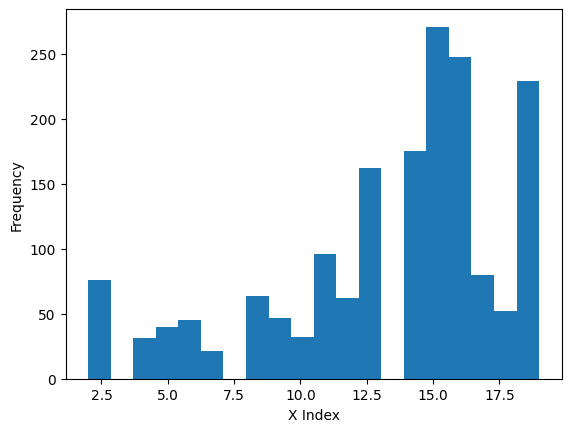

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.38488393141154215


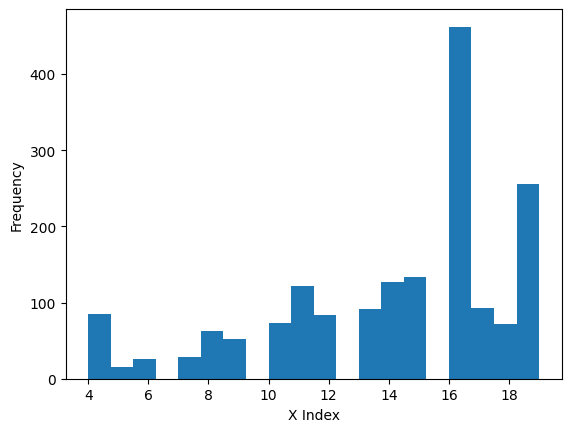

In [122]:
"""
Parameters
"""
# tf_data = paragraph
# grid_x = 15
# grid_y = 15
# learn_rate = 0.4
# rand_seed = 5
# iteration = 5000
# analysis = "paragraph"

# tf_data = sentences
# grid_x = 25
# grid_y = 25
# learn_rate = 0.5
# rand_seed = 3
# iteration = 5000
# analysis = "sentences"

tf_data = words
grid_x = 20
grid_y = 25
learn_rate = 0.4
rand_seed = 3
iteration = 10000
analysis = "words"

"""
END
"""

idx = 0
for company in companies:
    for year in years:
        vec_matrix = tfidf_vectorizer(tf_data[idx])
        soms = minisom_batch(
            grid_x,
            grid_y,
            vec_matrix.shape[1],
            learn_rate,
            rand_seed,
            vec_matrix,
            iteration,
        )
        winners = get_winning_neuron(soms, vec_matrix)
        save_path = fr"./results-hist/{analysis}/{company}"
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        show_hist(winners, grid_x, f"{save_path}/{year}")
        idx = idx + 1

In [126]:
# Calculate Similarity
dirs = ["paragraph", "sentences", "words"]

map_company = {
    "1": "ATIC_2018",
    "2": "ATIC_2020",
    "3": "ATIC_2022",
    "4": "DIVA_2018",
    "5": "DIVA_2020",
    "6": "DIVA_2022",
    "7": "EMTK_2018",
    "8": "EMTK_2020",
    "9": "EMTK_2022",
    "10": "KREN_2018",
    "11": "KREN_2020",
    "12": "KREN_2022",
    "13": "MCAS_2018",
    "14": "MCAS_2020",
    "15": "MCAS_2022",
    "16": "MLPT_2018",
    "17": "MLPT_2020",
    "18": "MLPT_2022",
    "19": "MTDL_2018",
    "20": "MTDL_2020",
    "21": "MTDL_2022",
    "22": "NFCX_2018",
    "23": "NFCX_2020",
    "24": "NFCX_2022",
    "25": "PTSN_2018",
    "26": "PTSN_2020",
    "27": "PTSN_2022",
}

paragraph_hist_data = []
sentences_hist_data = []
words_hist_data = []

for dir in dirs:
    for company in companies:
        for year in years:
            res = read_list(f"./results-hist/{dir}/{company}/{year}.md")
            if dir == "paragraph":
                paragraph_hist_data.append(res)
            if dir == "sentences":
                sentences_hist_data.append(res)
            if dir == "words":
                words_hist_data.append(res)

"""
Parameters
"""
base = "paragraph"
hist = paragraph_hist_data

# base = "sentences"
# hist = sentences_hist_data

# base = "words"
# hist = words_hist_data
"""
END
"""
idx = 0
for company in companies:
    for year in years:
        # compare paragraph
        temp_p = [base, "paragraph"]
        pidx = 1
        for p in paragraph_hist_data:
            res = calc_similarity(hist[idx], p)
            temp_p.append(f"{company} - {year} : {map_company[str(pidx)]} = {res}")
            pidx = pidx + 1
        save_list(
            temp_p, rf"./results-hist/{base}/{company}/comparison_paragraph_{year}.md"
        )

        # compare sentences
        temp_s = [base, "sentences"]
        sidx = 1
        for s in sentences_hist_data:
            res = calc_similarity(hist[idx], s)
            temp_s.append(f"{company} - {year} : {map_company[str(sidx)]} = {res}")
            sidx = sidx + 1
        save_list(
            temp_s, rf"./results-hist/{base}/{company}/comparison_sentences_{year}.md"
        )

        # compare words
        temp_w = [base, "words"]
        widx = 1
        for w in words_hist_data:
            res = calc_similarity(hist[idx], w)
            temp_w.append(f"{company} - {year} : {map_company[str(widx)]} = {res}")
            widx = widx + 1
        save_list(
            temp_w, rf"./results-hist/{base}/{company}/comparison_words_{year}.md"
        )

        idx = idx + 1